In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Keras functions
from keras.models import Sequential
# from keras.layers import Dense, Activation, Flatten
# from keras.layers import Conv2D, MaxPool2D
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Activation,Dropout,Flatten
from keras.optimizers import SGD

from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras  
from keras.optimizers import Adam


# Keras dataset
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train[1234].shape

(28, 28)

In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [6]:
x_train[1234].shape

(28, 28, 1)

In [7]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
model = Sequential()

## 原來模型 model1  <font color=red size=6>   accuracy = 0.933 </font> 

In [10]:
# Convolution 1
model.add(Conv2D(4,(5,5),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model.add(Conv2D(8,(5,5),padding='same'))
model.add(Activation('relu'))
# 再Max-Pooling
model.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('relu'))
# 再Max-Pooling
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [13]:
# hyperparamters
epochs = 10 

In [14]:
model_conv = model.fit(x_train,y_train,batch_size=100, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0898 - acc: 0.1313
Epoch 2/10
60000/60000 [==============================] - 31s 524us/step - loss: 0.0886 - acc: 0.19491s -
Epoch 3/10
60000/60000 [==============================] - 31s 522us/step - loss: 0.0832 - acc: 0.2393
Epoch 4/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0651 - acc: 0.50271s - loss:
Epoch 5/10
60000/60000 [==============================] - 32s 534us/step - loss: 0.0395 - acc: 0.7314
Epoch 6/10
60000/60000 [==============================] - 35s 585us/step - loss: 0.0296 - acc: 0.7991
Epoch 7/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0206 - acc: 0.8631
Epoch 8/10
60000/60000 [==============================] - 34s 573us/step - loss: 0.0162 - acc: 0.8943
Epoch 9/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.0137 - acc: 0.9102
Epoch 10/10
60000/60000 [==============================] - 31s 524us

<function matplotlib.pyplot.show(*args, **kw)>

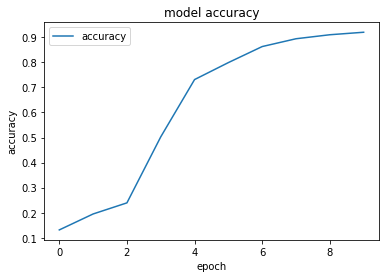

In [15]:
plt.plot(model_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# 建立可調參數及 模型 model2  - >  調整filter to 8
<br>
<font color=red size=6>  Accuracy = 0.847 </font>  


In [16]:
# hyperparamters
batch_size = 100     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 9       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (5, 5) # Def 5,5

In [17]:
model2 = Sequential()

# Convolution 1
model2.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model2.add(Activation('relu'))
# Max-Pooling
model2.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model2.add(Conv2D(filters2,kernelsize,padding='same'))
model2.add(Activation('relu'))
# 再Max-Pooling
model2.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model2.add(Conv2D(filters2*2,kernelsize,padding='same'))
model2.add(Activation('relu'))
# 再Max-Pooling
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(Flat_Dense))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))


In [18]:
model2.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [19]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 32)          12832     
__________

In [20]:
model2_conv = model2.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 47s 775us/step - loss: 0.0898 - acc: 0.11890s - loss: 0.0898 - a
Epoch 2/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.0889 - acc: 0.1723
Epoch 3/10
60000/60000 [==============================] - 44s 731us/step - loss: 0.0855 - acc: 0.1952
Epoch 4/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.0734 - acc: 0.3637
Epoch 5/10
60000/60000 [==============================] - 44s 726us/step - loss: 0.0516 - acc: 0.6220
Epoch 6/10
60000/60000 [==============================] - 43s 721us/step - loss: 0.0373 - acc: 0.7413
Epoch 7/10
60000/60000 [==============================] - 44s 735us/step - loss: 0.0263 - acc: 0.8266
Epoch 8/10
60000/60000 [==============================] - 44s 732us/step - loss: 0.0232 - acc: 0.8432
Epoch 9/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0216 - acc: 0.8532
Epoch 10/10
60000/60000 [==============================] - 46

<function matplotlib.pyplot.show(*args, **kw)>

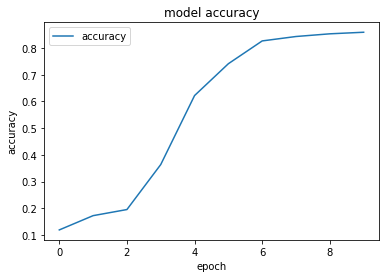

In [21]:
plt.plot(model2_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# 模型 model3 
## 調整filter to 8 & batch_size to 200 精確度大幅下降!
<br>
<font color=red size=6>  Accuracy = 0.596 </font>  

In [22]:
# hyperparamters
batch_size = 200     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 9       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (5, 5) # Def 5,5

In [23]:
model3 = Sequential()

# Convolution 1
model3.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model3.add(Activation('relu'))
# Max-Pooling
model3.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model3.add(Conv2D(filters2,kernelsize,padding='same'))
model3.add(Activation('relu'))
# 再Max-Pooling
model3.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model3.add(Conv2D(filters2*2,kernelsize,padding='same'))
model3.add(Activation('relu'))
# 再Max-Pooling
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(Flat_Dense))
model3.add(Activation('relu'))

model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [24]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          12832     
__________

In [ ]:
model3_conv = model3.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0898 - acc: 0.1306
Epoch 2/10
60000/60000 [==============================] - 43s 711us/step - loss: 0.0896 - acc: 0.1512
Epoch 3/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0891 - acc: 0.1682
Epoch 4/10
60000/60000 [==============================] - 39s 644us/step - loss: 0.0884 - acc: 0.1753
Epoch 5/10
60000/60000 [==============================] - 42s 697us/step - loss: 0.0868 - acc: 0.1833
Epoch 6/10
60000/60000 [==============================] - 42s 692us/step - loss: 0.0832 - acc: 0.2360
Epoch 7/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0782 - acc: 0.3462
Epoch 8/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0732 - acc: 0.3986
Epoch 9/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0645 - acc: 0.4638
Epoch 10/10
 3800/60000 [>.............................] - ETA: 37s - loss: 0.0587

In [ ]:
plt.plot(model3_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

#  模型 model4 
## 調整filter to 8 & batch_size to 200  精確度無明顯改善!
## 增加 Flat_Dense 到 32
## 減少 kernelsize  到  3x3 
<br>
<font color=red size=6>  Accuracy = 0.87 </font>  

In [ ]:
# hyperparamters
batch_size = 200     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 32       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (3, 3) # Def 5,5

In [ ]:
model4 = Sequential()

# Convolution 1
model4.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model4.add(Activation('relu'))
# Max-Pooling
model4.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model4.add(Conv2D(filters2,kernelsize,padding='same'))
model4.add(Activation('relu'))
# 再Max-Pooling
model4.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model4.add(Conv2D(filters2*2,kernelsize,padding='same'))
model4.add(Activation('relu'))
# 再Max-Pooling
model4.add(MaxPool2D(pool_size=(2,2)))

model4.add(Flatten())
model4.add(Dense(Flat_Dense))
model4.add(Activation('relu'))

model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])
# model4.compile(Adam(lr=0.0003),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model4.summary()

In [ ]:
model4_conv = model4.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

In [ ]:
plt.plot(model4_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show

# 調回調參數model5  - >  調回原來Model1 參數，只調整 filter to 8，改變loss function and optimizer ， 明顯提升精確度，相當關鍵
<br>
<font color=red size=6>  Accuracy = 0.98 </font>  

In [ ]:
# hyperparamters
batch_size = 100     # Def 100
filters1 = 8          # Def 4
filters2 = filters1*2 
Flat_Dense = 9       # Def 9
SGDlr = 0.07         # Def 0.07
kernelsize = (5, 5) # Def 5,5

In [ ]:
model5 = Sequential()

# Convolution 1
model5.add(Conv2D(filters1,kernelsize,padding='same',input_shape=(28,28,1)))
model5.add(Activation('relu'))
# Max-Pooling
model5.add(MaxPool2D(pool_size=(2,2)))


# Convolution 2
model5.add(Conv2D(filters2,kernelsize,padding='same'))
model5.add(Activation('relu'))
# 再Max-Pooling
model5.add(MaxPool2D(pool_size=(2,2)))

# Convolution 3
model5.add(Conv2D(filters2*2,kernelsize,padding='same'))
model5.add(Activation('relu'))
# 再Max-Pooling
model5.add(MaxPool2D(pool_size=(2,2)))

model5.add(Flatten())
model5.add(Dense(Flat_Dense))
model5.add(Activation('relu'))

model5.add(Dense(10))
model5.add(Activation('softmax'))

# model5.compile(loss='mse', optimizer=SGD(lr=0.07),metrics=['accuracy'])
model5.compile(Adam(lr=0.0003),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
model5.summary()

In [ ]:
model5_conv = model5.fit(x_train,y_train,batch_size=batch_size, epochs=epochs)

In [ ]:
plt.plot(model5_conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show